## K-Means

<p style='direction:rtl; text-align: right'>
یکی از ضعف‌های روش K-Means این است که در این روش فرض میکنیم کلاسترهای واقعی به صورت اشکال ساده و بدون حفره هستند که
این امر باعث می‌شود کلاستر بندی بعضی از توزیع‌ها با این روش، ناممکن شود. اما میتوان با اعمال تبدیل‌هایی در صفحه و انتقال نقاط
به دامنه‌ای دیگر، نقاط را به صورت مجموعه های ساده در‌آورد که کلاسترینگ را بهبود می‌بخشد.
</p>

<p style='direction:rtl; text-align: right'>
ایمپورت های لازم را انجام می‌دهیم و سپس نقاط را از فایل خوانده و نمایش می‌دهیم.
</p>

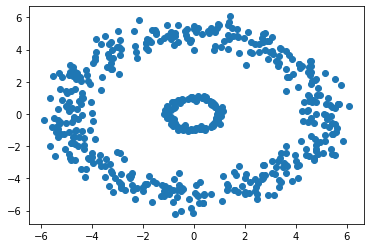

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import math
from sklearn.cluster import KMeans

f = open('./data/Points.txt')
n = int(f.readline())
points = np.array([list(map(float, f.readline().split())) for i in range(n)])

plt.scatter(points[:, 0], points[:, 1])
plt.show()

<p style='direction:rtl; text-align: right'>
همانطور که در شکل بالا می‌بینید، کلاستر‌ها به صورت حلقه‌اند و یک کلاستر در درون دیگری قرار گرفته است.
بنابرین روش K-Means نمی‌تواند آن ها را از هم تمیز دهد.
در ادامه با k=3 این روش را اعمال می‌کنیم.
</p>

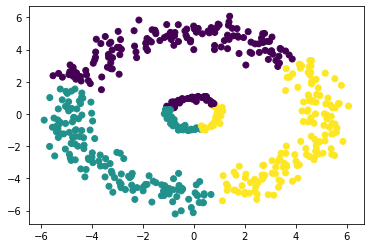

In [2]:
lbl = KMeans(n_clusters=3).fit_predict(points)
plt.scatter(points[:, 0], points[:, 1], c=lbl)
plt.show()

<p style='direction:rtl; text-align: right'>
همانطور که مشاهده میکنید، به درستی کلاستر بندی انجام نمیشود. گرچه می‌توان با افزایش k به نوعی Over-Segmentation انجام داد
که می‌تواند دو دسته را از هم جدا کند ولی هر دسته لزومن در یک کلاستر نخواهد بود.
</p>

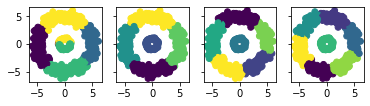

In [3]:
fig,ax = plt.subplots(ncols=4, sharey='row')
for i in range(4):
    lbl = KMeans(n_clusters=i+4).fit_predict(points)
    ax[i].scatter(points[:, 0], points[:, 1], c=lbl)
    ax[i].axis('scaled')
plt.show()

<p style='direction:rtl; text-align: right'>
اما همانگونه که پیداست، این دسته نقاط در هر دسته، فاصله تقریبن ثابتی تا مرکز مختصات دارند. بنابرین می‌توان با انتقال نقاط
به مختصات قطبی، اشکال مناسبی ایجاد کرد.
</p>

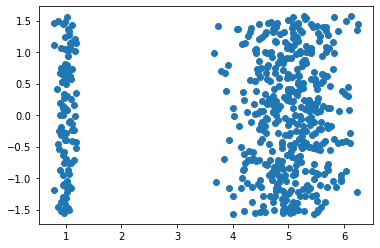

In [4]:
def to_polar(a):
    x = a[0]
    y = a[1]
    return math.sqrt(x ** 2 + y ** 2), math.atan(y / x)


polar = np.apply_along_axis(to_polar, 1, points)
plt.scatter(polar[:, 0], polar[:, 1])
plt.show()

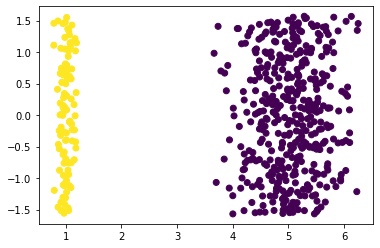

In [5]:
lbl = KMeans(n_clusters=2).fit_predict(polar)
plt.scatter(polar[:, 0], polar[:, 1], c=lbl)
plt.show()

<p style='direction:rtl; text-align: right'>
که مشاهده میکنید با k=2 به خوبی کلاستربندی می‌شود.
</p>
